In [12]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

In [13]:
df =pd.read_csv("Raw data/Original datasets/PV_individual.csv")
df.rename(columns={'Unnamed: 0':'date'},inplace=True)

In [14]:
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)

In [15]:
df.head(2)

,cum_power,Elec_kW,Gas_mxm
date,,,
2011-10-26,0.1,15.1,9.0
2011-10-27,10.2,7.4,9.2


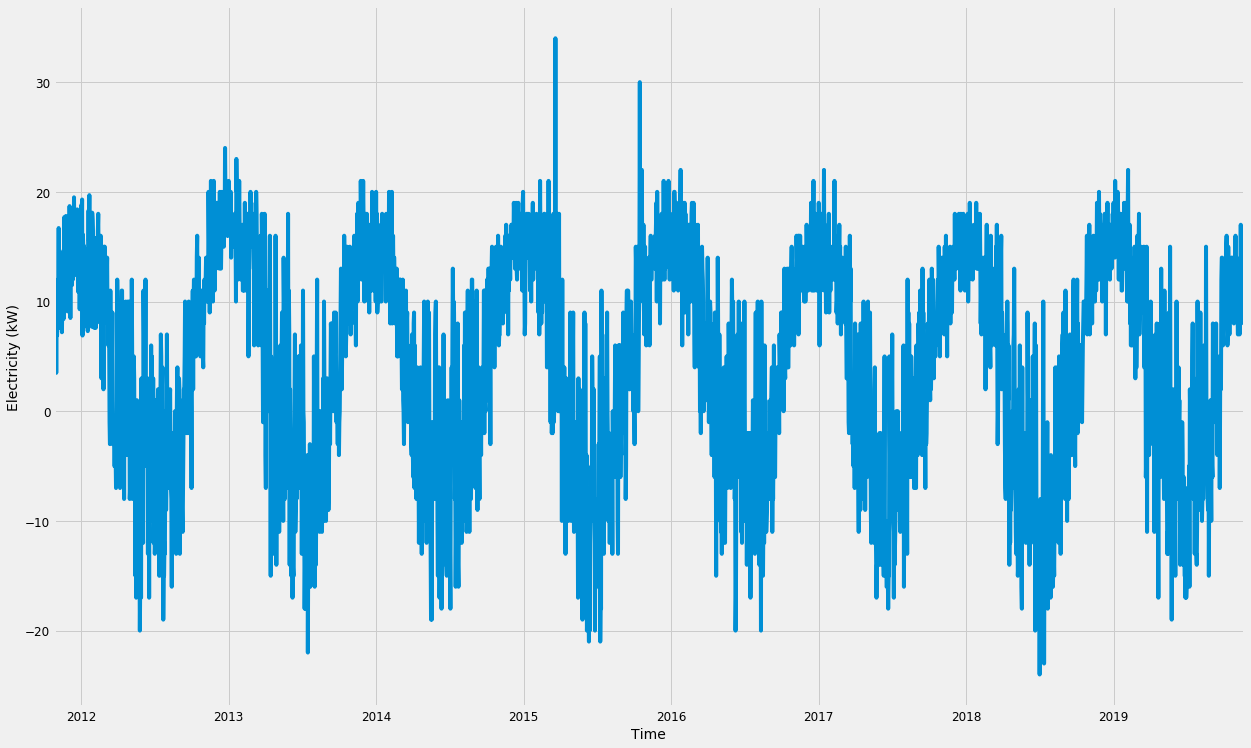

In [16]:
df['Elec_kW'].plot(figsize=(19,12))
plt.xlabel("Time")
plt.ylabel("Electricity (kW)")
plt.show()

In [17]:
# I dropped other two columns
df

,cum_power,Elec_kW,Gas_mxm
date,,,
2011-10-26,0.1,15.1,9.0
2011-10-27,10.2,7.4,9.2
2011-10-28,20.2,5.8,8.0
2011-10-29,29.6,4.9,6.6
2011-10-30,34.2,11.7,5.3
...,...,...,...
2019-11-16,32231.0,12.0,15.0
2019-11-17,32235.0,13.0,14.0
2019-11-18,32238.0,13.0,14.0


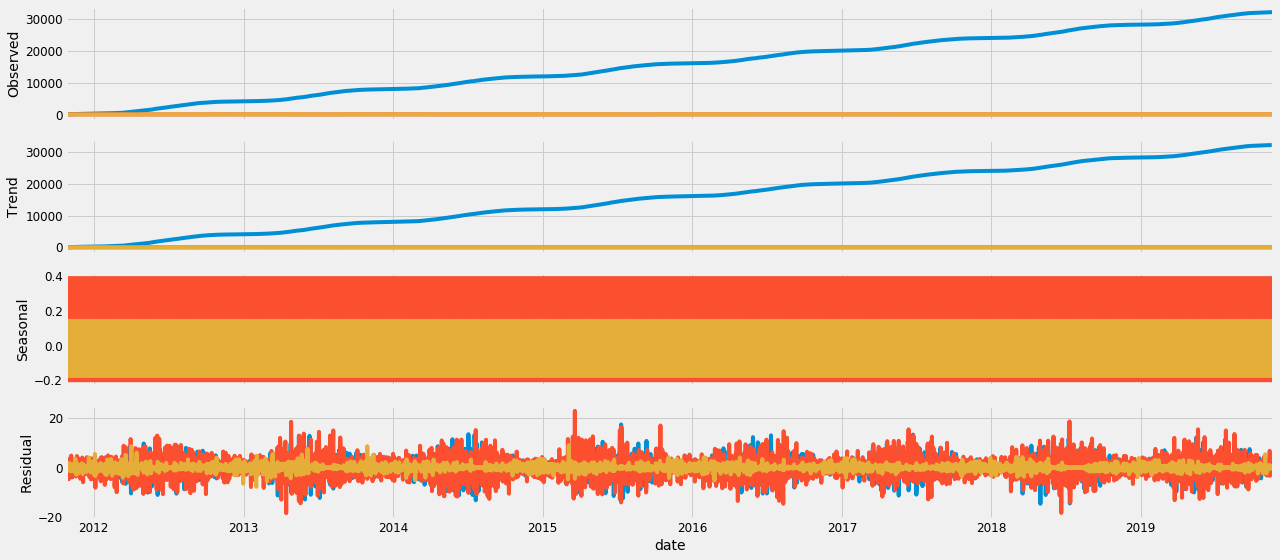

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df,  model='additive')
fig = decomposition.plot()
plt.show()

In [8]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [9]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

C:\Users\sande\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\sande\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\sande\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\sande\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\sande\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\sande\

In [10]:
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:18341.658999442654 Lowest!!

In [24]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

# fit model and save in results
results = mod.fit()
print(results.summary().tables[1])

C:\Users\sande\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3364      0.017     20.367      0.000       0.304       0.369
ar.S.L12      -0.0610      0.032     -1.883      0.060      -0.125       0.003
ma.S.L12      -0.4968      0.029    -17.161      0.000      -0.554      -0.440
sigma2        45.2445      1.062     42.614      0.000      43.164      47.325


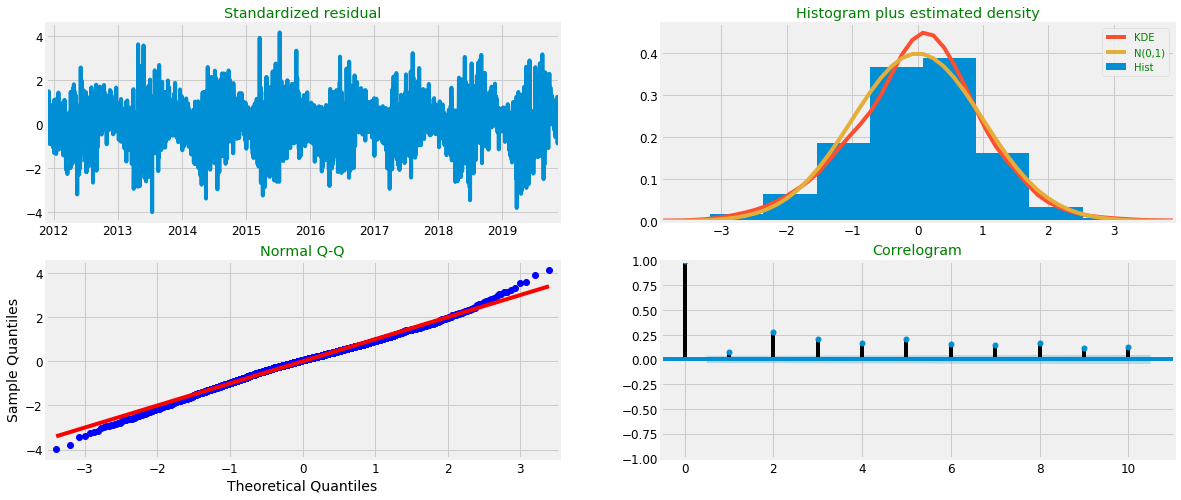

In [25]:
# After fit
results.plot_diagnostics(figsize=(18, 8))
plt.show()

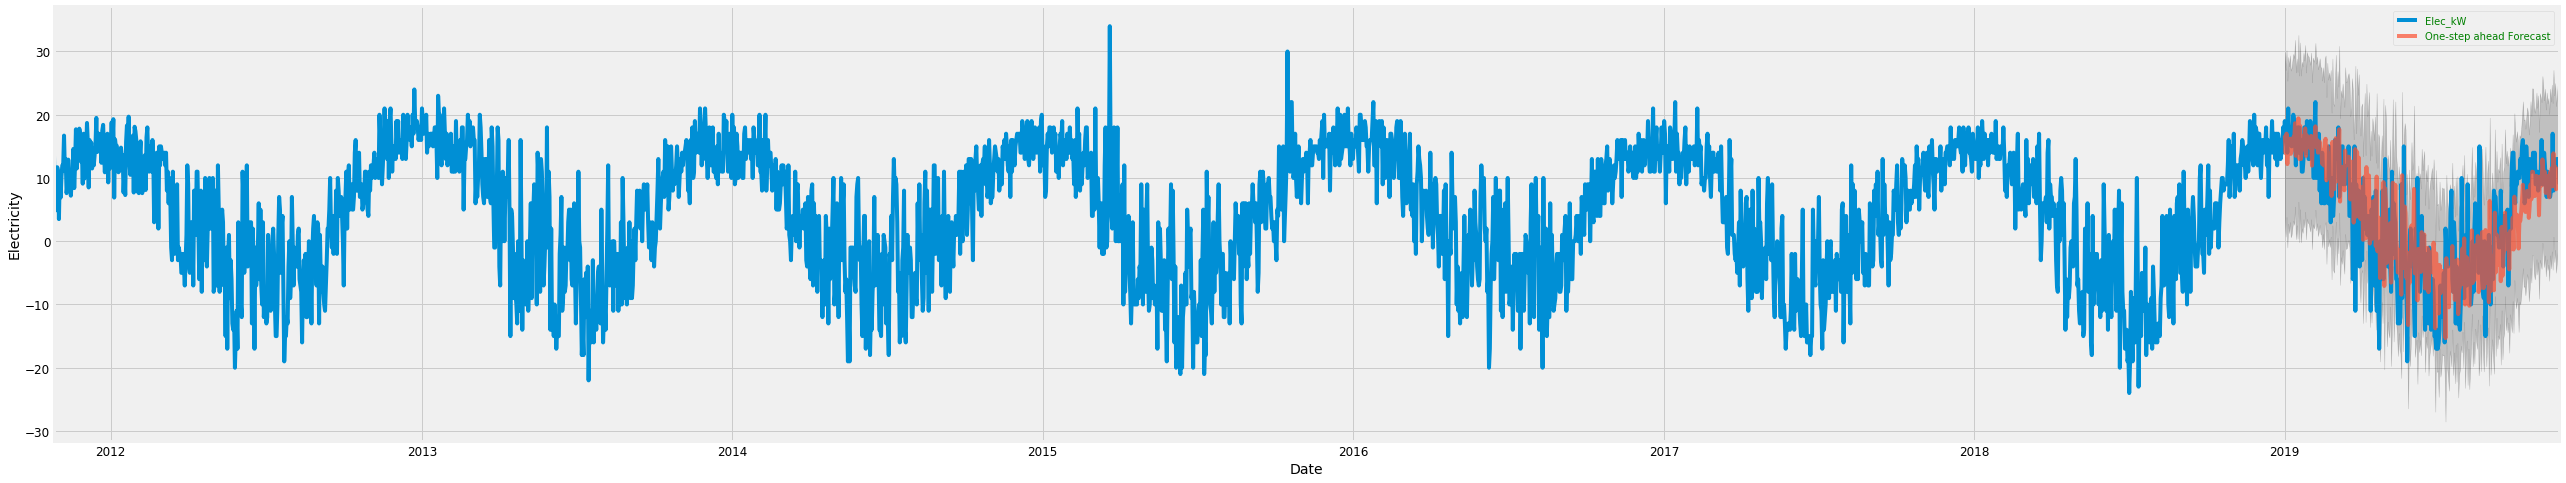

In [160]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(40, 8))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Electricity')
plt.legend()
plt.show()

In [156]:
u = pd.DataFrame({'Elec_kW':[1,2,3,4,5]})

In [157]:

# x= pd.DataFrame(df['2019-07-01':]['Elec_kW'])
# print(x)

df_forecasted = pd.DataFrame(df_forecasted, index=df_truth.index,columns=['Elec_kW'] )
df_forecasted

,Elec_kW
date,
2019-07-01,-11.428419
2019-07-02,-3.748797
2019-07-03,-8.231425
2019-07-04,-7.293779
2019-07-05,-4.681240
...,...
2019-11-16,8.205294
2019-11-17,9.825403
2019-11-18,11.450275


In [158]:
df_forecasted
#df_truth

,Elec_kW
date,
2019-07-01,-11.428419
2019-07-02,-3.748797
2019-07-03,-8.231425
2019-07-04,-7.293779
2019-07-05,-4.681240
...,...
2019-11-16,8.205294
2019-11-17,9.825403
2019-11-18,11.450275


In [159]:
#df_forecasted = pred.predicted_mean

df_truth = df['2019-07-01':]
mse = ((df_forecasted - df_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is Elec_kW    47.12
dtype: float64
The Root Mean Squared Error is Elec_kW    6.86
dtype: float64


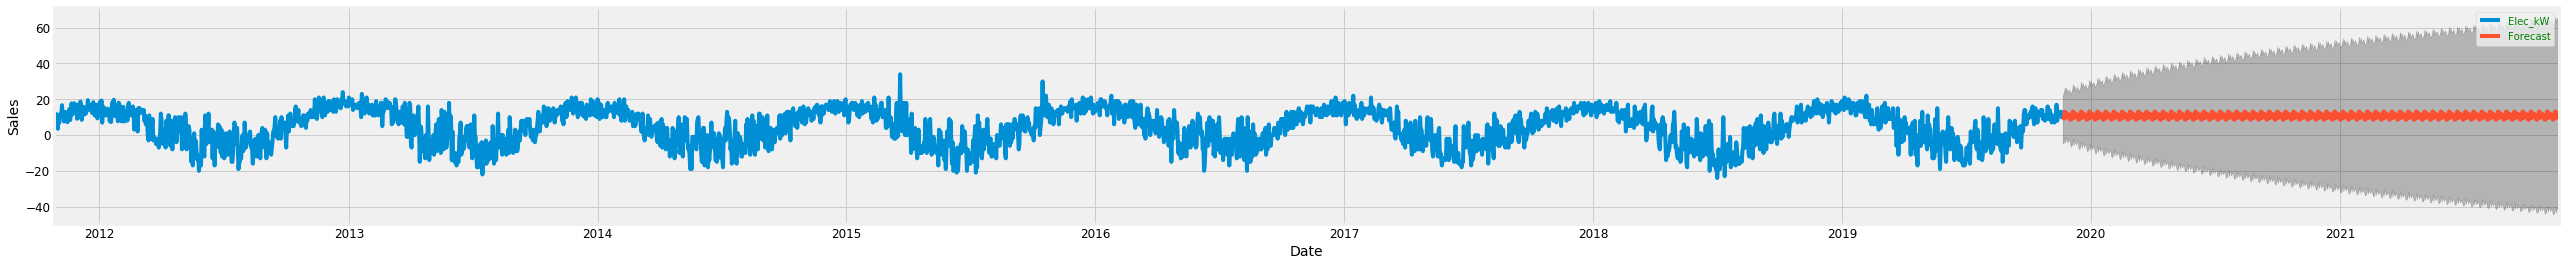

In [167]:
# Forecast for the next 12 months?? 30 days times 12

pred_uc = results.get_forecast(steps=730)
pred_ci = pred_uc.conf_int()

ax = df.plot(label='observed', figsize=(40, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [147]:
df_forecasted = pred.predicted_mean
df_forecasted.head(12)

2019-07-01   -11.428419
2019-07-02    -3.748797
2019-07-03    -8.231425
2019-07-04    -7.293779
2019-07-05    -4.681240
2019-07-06    -4.871444
2019-07-07    -4.798055
2019-07-08    -7.679815
2019-07-09   -15.323154
2019-07-10    -2.681543
2019-07-11    -6.952906
2019-07-12    -8.361732
Freq: D, dtype: float64

In [148]:
df_truth.head(12)

,Elec_kW
date,
2019-07-01,-16.0
2019-07-02,-14.0
2019-07-03,-7.0
2019-07-04,-12.0
2019-07-05,-8.0
2019-07-06,-9.0
2019-07-07,-5.0
2019-07-08,-16.0
2019-07-09,2.0


In [149]:
# Boundaries for the forecasting
pred_ci.head(24)

,lower Elec_kW,upper Elec_kW
2019-11-21,-4.632893,21.734113
2019-11-22,-4.623748,23.195549
2019-11-23,-3.492576,24.326721
2019-11-24,-0.937604,26.881693
2019-11-25,-4.310199,23.509098
2019-11-26,-1.403407,26.415890
2019-11-27,-2.519831,25.299466
2019-11-28,-4.008805,23.810492
2019-11-29,-3.487171,24.332126
2019-11-30,-2.332215,25.487082


In [150]:
forecast = pred_uc.predicted_mean
forecast.head(30)


2019-11-21     8.550610
2019-11-22     9.285901
2019-11-23    10.417073
2019-11-24    12.972045
2019-11-25     9.599450
2019-11-26    12.506241
2019-11-27    11.389817
2019-11-28     9.900843
2019-11-29    10.422478
2019-11-30    11.577433
2019-12-01    10.935330
2019-12-02     8.726286
2019-12-03     8.527050
2019-12-04     9.207442
2019-12-05    10.269595
2019-12-06    13.217810
2019-12-07     9.501859
2019-12-08    12.536368
2019-12-09    11.427048
2019-12-10    10.028923
2019-12-11    10.579745
2019-12-12    11.664231
2019-12-13    11.061305
2019-12-14     8.742987
2019-12-15     8.528487
2019-12-16     9.212229
2019-12-17    10.278594
2019-12-18    13.202815
2019-12-19     9.507814
2019-12-20    12.534530
Freq: D, dtype: float64